In [9]:
from typing import OrderedDict

import torch

from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.BB84Protocol import BB84Protocol
from protocol.connection_elements.PCCMEve import PCCMEve
from typing import OrderedDict

import torch

from protocol.BB84EveTrainableProtocol import BB84EveTrainableProtocol
from protocol.connection_elements.QCLEve import QCLEve

from plt_pab_fae import plt_fab_fae

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.
/home/wpalka/.virtualenvs/BB84-QCL-error-correction/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:3428: RuntimeWarning: Cregbundle set to False since an instruction needs to refer to individual classical wire
  return circuit_drawer(


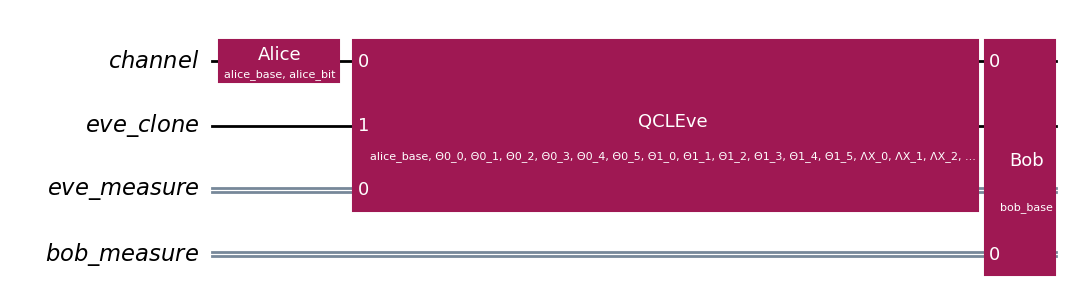

In [10]:
def get_pipeline(target_fab):
    return BB84EveTrainableProtocol(n_bits=128, elements=[QCLEve()], f_value=target_fab, seed=0, learning_rate=0.1, batch_size=128)

qc, _ = get_pipeline(1).qc_with_ctx()
qc.draw("mpl")

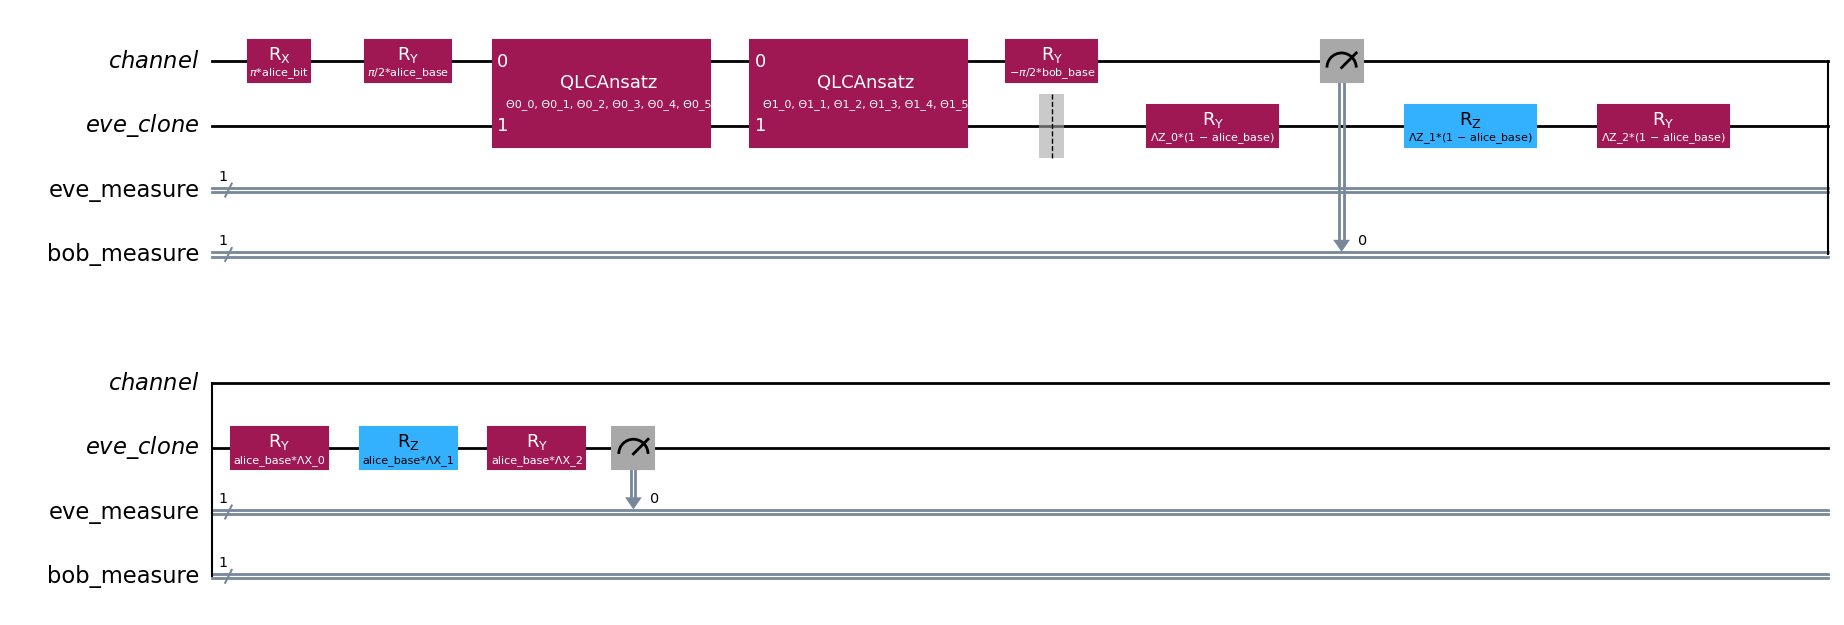

In [11]:
qc.decompose().draw("mpl")

In [12]:
def train(target_fab):
    bob_qber, eve_qber = [], []
    pipeline = get_pipeline(target_fab)
    for epoch in range(100):
        loss = pipeline.train()
        qber = pipeline.run()
        bob_qber.append(qber['bob_qber'])
        eve_qber.append(qber['eve_qber'])
        if epoch % 5 == 0:
            print(f'epoch: {epoch}, loss: {loss}, QBER: {qber}')

    return pipeline, bob_qber, eve_qber

In [13]:
pipeline85, bob_qber, eve_qber = train(0.853)

No gradient function provided, creating a gradient function. If your Sampler requires transpilation, please provide a pass manager.


epoch: 0, loss: 2.3715174198150635, QBER: {'bob_qber': np.float64(0.06349206349206349), 'eve_qber': np.float64(0.5714285714285714)}
epoch: 5, loss: -0.7071029543876648, QBER: {'bob_qber': np.float64(0.11111111111111116), 'eve_qber': np.float64(0.31746031746031744)}
epoch: 10, loss: -0.7288269996643066, QBER: {'bob_qber': np.float64(0.19047619047619047), 'eve_qber': np.float64(0.3015873015873016)}
epoch: 15, loss: -0.793303906917572, QBER: {'bob_qber': np.float64(0.2063492063492064), 'eve_qber': np.float64(0.23809523809523814)}
epoch: 20, loss: -0.8426907658576965, QBER: {'bob_qber': np.float64(0.1428571428571429), 'eve_qber': np.float64(0.2063492063492064)}
epoch: 25, loss: -0.8380064964294434, QBER: {'bob_qber': np.float64(0.17460317460317465), 'eve_qber': np.float64(0.2222222222222222)}
epoch: 30, loss: -0.8111635446548462, QBER: {'bob_qber': np.float64(0.15873015873015872), 'eve_qber': np.float64(0.3015873015873016)}
epoch: 35, loss: -0.7508360743522644, QBER: {'bob_qber': np.float6


KeyboardInterrupt



In [6]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.853)

Final parameters {'Θ0_0': np.float32(-8.156688), 'Θ0_1': np.float32(7.476711), 'Θ0_2': np.float32(4.083892), 'Θ0_3': np.float32(-0.8677327), 'Θ0_4': np.float32(-4.7847614), 'Θ0_5': np.float32(-1.2293756), 'Θ1_0': np.float32(-0.8241127), 'Θ1_1': np.float32(-1.052581), 'Θ1_2': np.float32(4.16376), 'Θ1_3': np.float32(1.6956373), 'Θ1_4': np.float32(-1.61936), 'Θ1_5': np.float32(-5.7496076), 'ΛZ_0': np.float32(-7.077841), 'ΛZ_1': np.float32(-3.6538892), 'ΛZ_2': np.float32(-0.34081072), 'ΛX_0': np.float32(2.909284), 'ΛX_1': np.float32(0.060909435), 'ΛX_2': np.float32(-6.4086347)}
After training QBER: {'bob_qber': np.float64(0.25396825396825395), 'eve_qber': np.float64(0.2222222222222222)}
Zeroed parameters: QBER: {'bob_qber': np.float64(0.0), 'eve_qber': np.float64(0.5714285714285714)}


In [ ]:
pipeline95, bob_qber, eve_qber = train(0.95)

In [ ]:
plt_fab_fae(bob_qber, eve_qber, target_fab=0.95)